In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp


# **Exercise 3.1** Concrete items

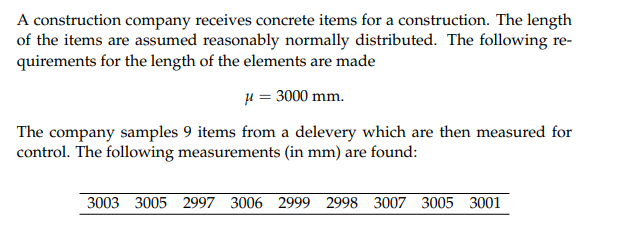

#### **a) Compute the following three statistics: the sample mean, the sample standard deviation and the standard error of the mean, and what are the interpretations of these statistics?**


### **Solution:**

In [16]:
items = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])

print(items.mean())
print(f'The sample mean is: {np.mean(items)}')

print(f'The samle standard deviation is: {np.std(items, ddof=1)}')

3002.3333333333335
The sample mean is: 3002.3333333333335
The samle standard deviation is: 3.708099243547832


The standard error of meam is:

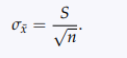

In [17]:
print(f'The standard error of the mean is: {3.708 / np.sqrt(9)}')

The standard error of the mean is: 1.236


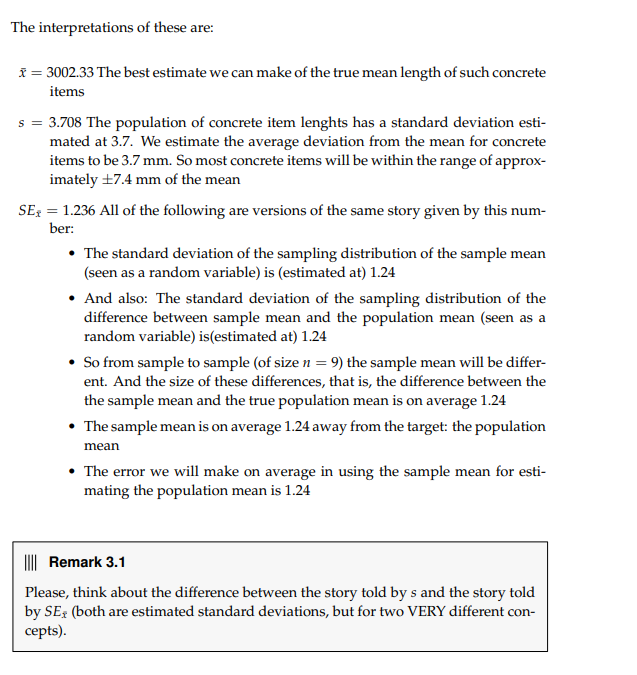

#### **b) In a construction process, 5 concrete items are joined together to a single construction with a length which is then the complete length of the 5 concrete items. It is very important that the length of this new construction is within 15 m plus/minus 1 cm. How often will it happen that such a construction will be more than 1 cm away from the 15 m target (assume that the population mean concrete item length is µ = 3000 mm and that the population standard deviation is σ = 3)?**


### **Solution:**

In [18]:

# Given values
mu = 15000  # mean total length in mm
sigma_item = 3  # standard deviation of one item in mm
n = 5  # number of items

# Calculate the standard deviation of the total length
sigma_total = (np.sqrt(n)) * sigma_item  # sqrt(n) * sigma of one item

# Define the target range
target = 15000  # target length in mm
tolerance = 10  # tolerance in mm

# Calculate z-scores for the upper and lower bounds
z_lower = (target - tolerance - mu) / sigma_total
z_upper = (target + tolerance - mu) / sigma_total

# Calculate the probability of being within the target range
p_within = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

# Probability of being outside the target range
p_outside = 1 - p_within

print("Probability of the total length being more than 1 cm away from the 15 m target is {:.4f}".format(p_outside))


Probability of the total length being more than 1 cm away from the 15 m target is 0.1360


#### **c) Find the 95% confidence interval for the mean µ**

### **Solution:**

In [30]:
x = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])
print(np.mean(x))

print(np.std(x, ddof=1))

# Quantile
print(stats.t.ppf(0.975, df=8))

# Confidence interval directly
(CI_low,CI_high) = stats.ttest_1samp(x, popmean=0).confidence_interval(confidence_level=0.95)
print(CI_low,CI_high)

(CI_low,CI_high) = stats.ttest_1samp(x, popmean=0).confidence_interval()
print(CI_low,CI_high)




3002.3333333333335
3.708099243547832
2.306004135204166
2999.483035936877 3005.18363072979
2999.483035936877 3005.18363072979


#### **d) Find the 99% confidence interval for µ. Compare with the 95% one from above and explain why it is smaller/larger!**

### **Solution:**

In [24]:
(CI_low,CI_high) = stats.ttest_1samp(x, popmean=0).confidence_interval(confidence_level=0.99)
print(CI_low,CI_high)

2998.1859635916244 3006.4807030750426


It makes good sense that the 99% confidence interval becomes larger than the 95%
one, as the consequence of wanting to be more confident on capturing the true mean
µ will make us having to state a larger interval.

#### **e) Find the 95% confidence intervals for the variance $σ^2$ and the standard deviation σ.**

### **Solution:**

In [32]:
print(stats.chi2.ppf((0.975,0.025), df=8))

[17.53454614  2.17973075]
[ 6.27333032 50.46494854]
[2.50466172 7.10386856]


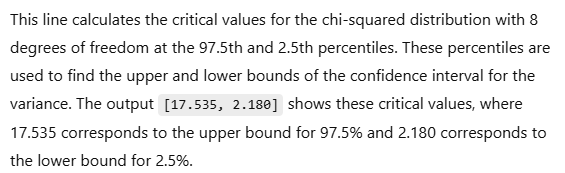

In [ ]:
CI_var = 8*13.75/stats.chi2.ppf((0.975,0.025), df=8)
print(CI_var)

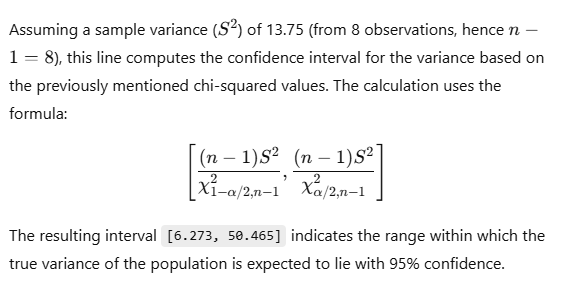

In [ ]:
CI_std = np.sqrt(CI_var)
print(CI_std)


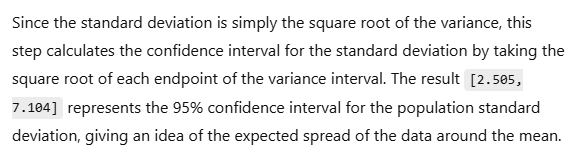

#### **f) Find the 99% confidence intervals for the variance  $σ^2$ and the standard deviation σ.**

In [33]:
print(stats.chi2.ppf((0.995,0.005), df=8))

CI_var = 8*13.75/stats.chi2.ppf((0.995,0.005), df=8)
print(CI_var)

CI_std = np.sqrt(CI_var)
print(CI_std)


[21.95495499  1.34441309]
[ 5.01025851 81.82009017]
[2.23836067 9.04544582]


---

# **Exercise 3.2** Aluminum profile

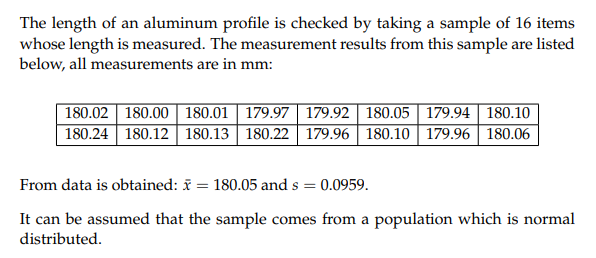


#### **a) A 90%-confidence interval for µ becomes?**

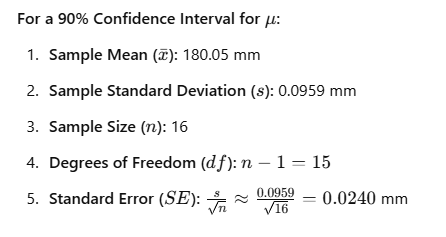

In [34]:
x = np.array([180.02, 180.00, 180.01, 179.97, 179.92, 180.05, 179.94,180.10, 180.24, 180.12, 180.13, 180.22, 179.96, 180.10, 179.96, 180.06])


(CI_low,CI_high) = stats.ttest_1samp(x, popmean=0).confidence_interval(confidence_level=0.90)
print(CI_low,CI_high)

180.0079633292111 180.09203667078893


#### **b) A 99%-confidence interval for σ becomes?**

In [38]:
s = 0.0959**2 # samle standard deviation squared
df = 15 # degrees of freedom

CI_var = df*s/stats.chi2.ppf((0.995,0.005), df=15)

CI_std = np.sqrt(CI_var)
print(CI_std)

# therefore = [0.065; 0.173] 



[0.06485128 0.17315782]
